In [ ]:
# Example: Customer Segmentation for a Retail Company 🛍️
# Business Context
# A retail chain wants to understand its customers better. Instead of treating everyone the same,
# they want to group customers into segments (like “budget shoppers,” “loyal premium buyers,” etc.)
#  so they can:
# - Personalize marketing campaigns
# - Recommend products more effectively
# - Improve customer retention

# Dataset (simplified)
# Imagine we have customer data with features like:
# - Annual Income (numeric)
# - Spending Score (numeric, based on purchase behavior)
# - Age (numeric)

In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Create Dataset
data = {
    'CustomerID': [1,2,3,4,5,6],
    'Age': [25,45,35,23,52,40],
    'AnnualIncome': [25000,60000,40000,20000,80000,50000],
    'SpendingScore': [30,70,50,20,90,60]
}

df = pd.DataFrame(data)

# Step 3: Select Features (Drop CustomerID)
X = df[['Age','AnnualIncome','SpendingScore']]

# Step 4: Scale the Data (Important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 6: Show Result
print(df)


   CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   25         25000             30        2
1           2   45         60000             70        1
2           3   35         40000             50        0
3           4   23         20000             20        2
4           5   52         80000             90        1
5           6   40         50000             60        0


In [ ]:
# Example: Hospital Patient Segmentation 🏥
# Business Context
# A hospital wants to improve patient care and resource allocation. Instead of treating all
# patients the same, they want to group them into segments based on health and lifestyle data.
#  This helps with:
# - Designing personalized treatment plans
# - Predicting high‑risk patients
# - Managing hospital resources more efficiently

# Dataset (simplified)
# Features we might use:
# - Age
# - BMI (Body Mass Index)
# - Number of yearly hospital visits
# - Chronic conditions count

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = {
    'PatientID': [101,102,103,104,105,106],
    'Age': [25,60,45,30,70,50],
    'BMI': [22,30,28,24,35,27],
    'HospitalVisits': [1,5,3,2,7,4],
    'ChronicConditions': [0,2,1,0,3,1]
}

df = pd.DataFrame(data)

X = df[['Age','BMI','HospitalVisits','ChronicConditions']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df)

   PatientID  Age  BMI  HospitalVisits  ChronicConditions  Cluster
0        101   25   22               1                  0        2
1        102   60   30               5                  2        0
2        103   45   28               3                  1        0
3        104   30   24               2                  0        2
4        105   70   35               7                  3        1
5        106   50   27               4                  1        0


In [ ]:
# Scenario Question 💼
# A telecommunications company has collected data on 500 customers, including their monthly bill
# amount, average call duration, internet usage, and number of support calls. The company wants
# to group customers into meaningful segments to design targeted marketing campaigns and improve customer
#  service.
# You are tasked with:
# - Using K‑Means clustering to explore possible customer segments.
# - Applying the Elbow Method to determine where adding more clusters stops giving significant improvement.
# - Using the Silhouette Score to validate which number of clusters produces the most well‑separated
# and meaningful groups.

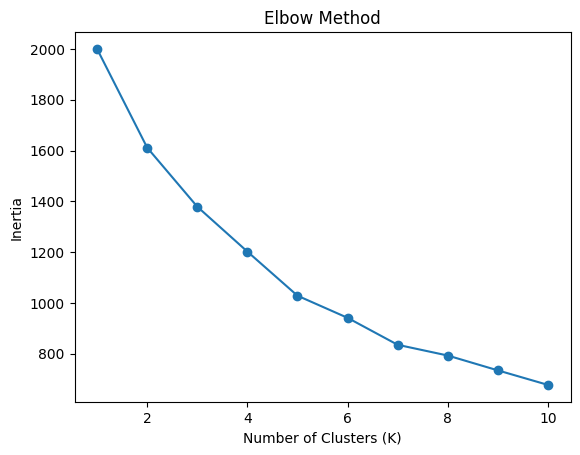

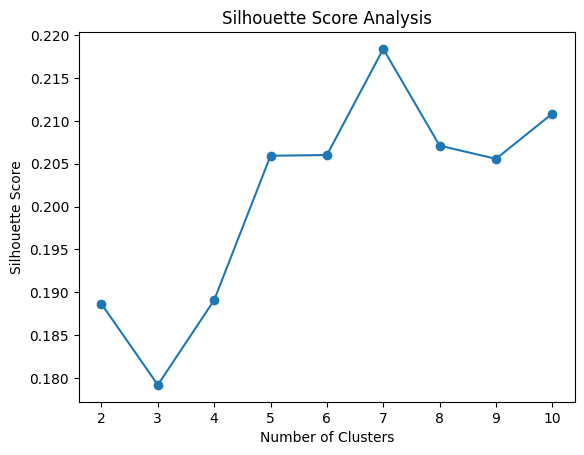

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

np.random.seed(42)

data = {
    "MonthlyBill": np.random.randint(20, 120, 500),
    "CallDuration": np.random.randint(50, 500, 500),
    "InternetUsage": np.random.randint(5, 100, 500),
    "SupportCalls": np.random.randint(0, 10, 500)
}

df = pd.DataFrame(data)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

inertia = []

K_range = range(1,11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    sil_scores.append(score)

plt.figure()
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()

In [ ]:
# 🎬 Scenario: Movie Streaming Platform
# A movie streaming company has collected data on 1,000 users, including:
# - Average watch time per week
# - Preferred genres (action, comedy, drama, etc.)
# - Number of devices used (TV, phone, tablet)
# - Frequency of subscription pauses or cancellations
# The company wants to group users into meaningful segments to:
# - Recommend personalized movie lists
# - Design loyalty rewards for binge‑watchers
# - Identify users at risk of canceling subscriptions
# Your Tasks
# - Apply K‑Means clustering to explore possible user segments.
# - Example clusters: “Weekend binge‑watchers,” “Casual family viewers,” “Genre loyalists.”
# - Use the Elbow Method to find the point where adding more clusters doesn’t improve grouping much.
# - This helps decide whether 3, 4, or 5 clusters make sense.
# - Validate with Silhouette Score to check if the chosen clusters are well‑separated and meaningful.
# - Ensures that “binge‑watchers” aren’t mixed up with “casual viewers.”

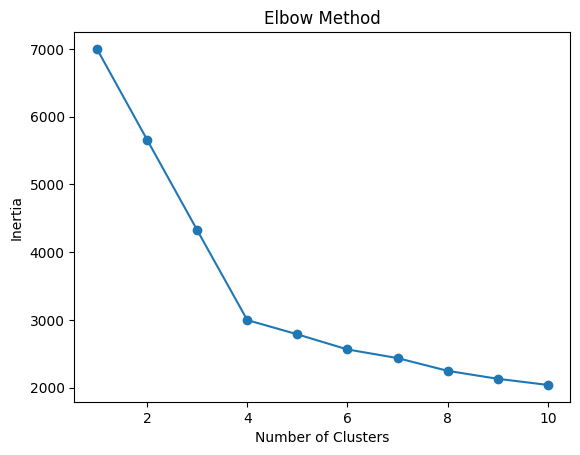

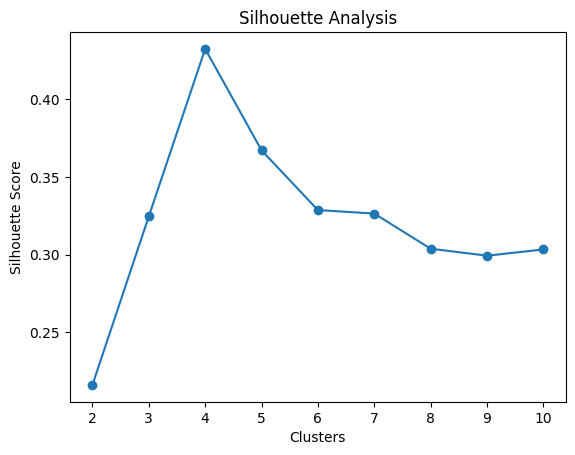

   WatchTime   Genre  DevicesUsed  SubscriptionPauses  Cluster
0         39  Comedy            3                   4        1
1         29   Drama            4                   3        0
2         15  Action            3                   3        2
3          8   SciFi            4                   2        3
4         21   Drama            2                   1        0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(42)

data = {
    "WatchTime": np.random.randint(1, 40, 1000),      # hours/week
    "Genre": np.random.choice(["Action","Comedy","Drama","SciFi"], 1000),
    "DevicesUsed": np.random.randint(1, 5, 1000),
    "SubscriptionPauses": np.random.randint(0, 6, 1000)
}

df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=["Genre"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

sil_scores = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure()
plt.plot(range(2,11), sil_scores, marker='o')
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

final_model = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = final_model.fit_predict(X_scaled)

print(df.head())